<a href="https://colab.research.google.com/github/TaeMD/ML-projects/blob/main/Mortality_Prediction_ICU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data source: https://www.kaggle.com/datasets/msafi04/predict-mortality-of-icu-patients-physionet


In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import math
from sklearn.metrics import accuracy_score

from sklearn.model_selection import train_test_split
import keras

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("/content/drive/MyDrive/Mortality Prediction in ICU/train.csv")

In [3]:
labels = pd.read_csv('/content/drive/MyDrive/Mortality Prediction in ICU/labels.csv')

In [4]:
df.head()

,ALP,ALT,AST,Age,Albumin,BUN,Bilirubin,Cholesterol,Creatinine,DiasABP,...,RespRate,SaO2,SysABP,Temp,TroponinI,TroponinT,Urine,WBC,Weight,pH
0,77.0,31.0,46.0,54,2.973333,10.500000,0.7,154.0,0.750000,58.795833,...,17.428571,97.250000,116.891892,37.357143,2.1,0.14,171.052632,10.300000,80.060976,7.387273
1,77.0,31.0,46.0,76,2.973333,18.333333,0.7,154.0,1.100000,58.897059,...,19.000000,96.833333,113.411765,36.939130,2.1,0.14,151.560976,11.266667,80.670588,7.395000
2,116.0,83.0,199.5,44,2.500000,4.666667,2.9,154.0,0.333333,67.125000,...,19.000000,95.000000,125.687500,37.800000,2.1,0.14,124.951219,4.700000,56.700000,7.495000
3,105.0,12.0,15.0,68,4.400000,17.666667,0.2,154.0,0.766667,58.795833,...,15.457627,97.250000,116.891892,36.223077,2.1,0.14,545.833333,9.400000,84.600000,7.387273
4,77.0,31.0,46.0,88,3.300000,35.000000,0.7,154.0,1.000000,58.795833,...,19.166667,97.250000,116.891892,36.880000,2.1,0.14,62.131579,4.300000,80.060976,7.387273


In [5]:
labels.head()

,In-hospital_death
0,0
1,0
2,0
3,0
4,0


Exploratory Data Analysis

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 42 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ALP          3999 non-null   float64
 1   ALT          3999 non-null   float64
 2   AST          3999 non-null   float64
 3   Age          3999 non-null   int64  
 4   Albumin      3999 non-null   float64
 5   BUN          3999 non-null   float64
 6   Bilirubin    3999 non-null   float64
 7   Cholesterol  3999 non-null   float64
 8   Creatinine   3999 non-null   float64
 9   DiasABP      3999 non-null   float64
 10  FiO2         3999 non-null   float64
 11  GCS          3999 non-null   float64
 12  Gender       3999 non-null   int64  
 13  Glucose      3999 non-null   float64
 14  HCO3         3999 non-null   float64
 15  HCT          3999 non-null   float64
 16  HR           3999 non-null   float64
 17  Height       3999 non-null   float64
 18  ICUType      3999 non-null   int64  
 19  K     

In [7]:
df.describe()

,ALP,ALT,AST,Age,Albumin,BUN,Bilirubin,Cholesterol,Creatinine,DiasABP,...,RespRate,SaO2,SysABP,Temp,TroponinI,TroponinT,Urine,WBC,Weight,pH
count,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,...,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000
mean,89.259978,91.709903,130.219258,64.247562,2.975942,25.449665,1.216527,152.403601,1.363130,59.262693,...,19.223967,96.940907,118.145550,36.956291,2.368702,0.337362,133.363074,12.521058,82.799384,7.488870
std,70.397850,427.290858,590.482153,17.563142,0.404440,20.586576,2.961385,13.891279,1.406947,9.080069,...,2.074830,2.296143,16.540816,0.727382,2.418656,1.276145,117.304284,6.466063,23.117431,2.986373
min,12.000000,3.000000,6.000000,15.000000,1.100000,2.250000,0.100000,0.000000,0.200000,0.000000,...,10.543478,38.800000,0.000000,21.644615,0.300000,0.010000,0.000000,0.100000,3.500000,6.311667
25%,77.000000,31.000000,46.000000,52.500000,2.973333,13.000000,0.700000,154.000000,0.700000,55.843712,...,19.000000,97.230769,111.099359,36.614286,2.100000,0.125000,74.044118,8.900000,68.201064,7.364142
50%,77.000000,31.000000,46.000000,67.000000,2.973333,19.000000,0.700000,154.000000,0.933333,58.795833,...,19.000000,97.250000,116.891892,36.968750,2.100000,0.140000,111.032258,11.466667,80.060976,7.387273
75%,82.000000,32.250000,49.000000,78.000000,3.000000,30.000000,0.700000,154.000000,1.366667,62.210006,...,19.290323,97.250000,123.504098,37.364401,2.100000,0.140000,160.419207,14.950000,93.040476,7.407500
max,1472.333333,9143.428571,15680.000000,90.000000,5.300000,170.833333,46.366667,330.000000,16.457143,106.666667,...,39.655172,100.000000,181.725000,39.748980,49.200000,24.040000,3082.380952,137.233333,300.000000,128.532500


In [8]:
labels.shape

(3999, 1)

In [9]:
labels_counts= labels['In-hospital_death'].value_counts()
labels_counts 

0    3445
1     554
Name: In-hospital_death, dtype: int64

In [10]:
labels_df = pd.DataFrame({'mortality':labels_counts.index, 'values':labels_counts.values})

In [11]:
labels_df

,mortality,values
0,0,3445
1,1,554


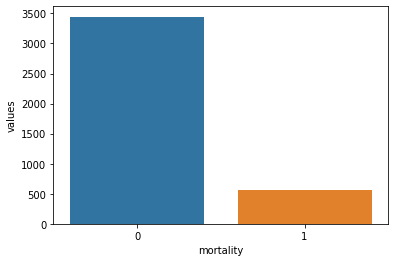

In [12]:
sns.barplot(x='mortality', y='values', data=labels_df)

In [13]:
df.isnull().sum()

ALP            0
ALT            0
AST            0
Age            0
Albumin        0
BUN            0
Bilirubin      0
Cholesterol    0
Creatinine     0
DiasABP        0
FiO2           0
GCS            0
Gender         0
Glucose        0
HCO3           0
HCT            0
HR             0
Height         0
ICUType        0
K              0
Lactate        0
MAP            0
MechVent       0
Mg             0
NIDiasABP      0
NIMAP          0
NISysABP       0
Na             0
PaCO2          0
PaO2           0
Platelets      0
RecordID       0
RespRate       0
SaO2           0
SysABP         0
Temp           0
TroponinI      0
TroponinT      0
Urine          0
WBC            0
Weight         0
pH             0
dtype: int64

In [14]:
labels.isnull().sum()

In-hospital_death    0
dtype: int64

In [15]:
print(set(df['ALT'].tolist()))

{3.0, 4.5, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 9.25, 12.0, 13.33333333, 14.0, 15.0, 13.0, 17.0, 18.0, 19.0, 19.33333333, 21.66666667, 22.0, 23.0, 24.0, 23.5, 22.66666667, 27.0, 28.0, 25.0, 30.0, 31.0, 32.0, 33.0, 29.5, 35.0, 36.0, 29.0, 38.5, 31.5, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 46.66666667, 48.0, 49.0, 47.0, 10.25, 10.5, 44.33333333, 54.0, 9.5, 56.0, 57.5, 58.0, 59.0, 60.0, 12.5, 61.33333333, 11.0, 64.66666667, 62.0, 66.66666667, 67.0, 63.0, 64.5, 66.0, 14.5, 65.0, 71.66666667, 70.0, 70.2, 15.5, 76.0, 78.33333333, 77.0, 80.5, 16.0, 82.0, 83.0, 79.0, 85.0, 86.0, 85.5, 88.5, 89.0, 90.0, 87.5, 92.5, 93.66666667, 17.5, 95.66666667, 96.0, 19.5, 98.66666667, 96.5, 100.5, 20.5, 102.5, 20.0, 103.0, 98.0, 106.0, 21.5, 21.0, 109.3333333, 110.3333333, 22.5, 112.0, 109.0, 107.5, 113.0, 23.75, 117.3333333, 118.0, 119.6666667, 120.0, 24.5, 121.0, 122.0, 124.6666667, 125.3333333, 125.0, 124.0, 25.5, 128.0, 130.0, 26.0, 131.6666667, 133.0, 126.0, 126.5, 27.5, 134.5, 138.5, 139.0, 140.6666667, 1

In [16]:
for i in df.columns:
  print("\n")
  print("=================================", i, "========================================")
  print(set(df[i].tolist()))



================================= ALP ========================================
{12.0, 19.0, 20.0, 21.0, 22.33333333, 22.0, 22.5, 25.0, 25.25, 26.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 36.5, 38.0, 39.25, 40.5, 41.0, 42.0, 43.5, 44.0, 45.0, 46.0, 47.0, 48.0, 49.5, 50.0, 46.25, 46.66666667, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 63.5, 65.0, 67.0, 67.5, 60.5, 70.0, 71.0, 72.0, 73.0, 74.0, 75.5, 76.5, 77.0, 76.0, 75.0, 80.0, 81.0, 80.33333333, 76.42857143, 84.0, 85.0, 81.5, 87.0, 88.0, 89.5, 90.66666667, 86.0, 92.0, 93.0, 93.5, 92.5, 96.0, 97.0, 94.0, 99.0, 99.5, 93.33333333, 102.6666667, 102.0, 104.6666667, 104.25, 103.0, 107.5, 104.8333333, 109.0, 105.0, 106.0, 104.0, 108.0, 109.5, 110.5, 111.4, 112.0, 114.0, 115.0, 116.0, 117.3333333, 117.0, 119.0, 122.0, 123.0, 121.0, 125.5, 126.6666667, 127.5, 127.0, 128.0, 126.0, 131.0, 132.0, 132.6666667, 129.0, 136.0, 137.0, 137.75, 139.0, 140.0, 141.0, 140.5, 143.0, 144.0, 146.0, 141.5, 145.33333

gender value

ICU type

MechVent

NISysABP = 0

NIDiasABP = 0

NIMAP = 0

RecordID

SysABP

Weight = 3.5

In [17]:
df.columns

Index(['ALP', 'ALT', 'AST', 'Age', 'Albumin', 'BUN', 'Bilirubin',
       'Cholesterol', 'Creatinine', 'DiasABP', 'FiO2', 'GCS', 'Gender',
       'Glucose', 'HCO3', 'HCT', 'HR', 'Height', 'ICUType', 'K', 'Lactate',
       'MAP', 'MechVent', 'Mg', 'NIDiasABP', 'NIMAP', 'NISysABP', 'Na',
       'PaCO2', 'PaO2', 'Platelets', 'RecordID', 'RespRate', 'SaO2', 'SysABP',
       'Temp', 'TroponinI', 'TroponinT', 'Urine', 'WBC', 'Weight', 'pH'],
      dtype='object')

In [18]:
df['Gender'].value_counts()
df[df['Gender'] == 139060]

,ALP,ALT,AST,Age,Albumin,BUN,Bilirubin,Cholesterol,Creatinine,DiasABP,...,RespRate,SaO2,SysABP,Temp,TroponinI,TroponinT,Urine,WBC,Weight,pH
2570,77.0,31.0,46.0,42,2.973333,19.0,0.7,154.0,1.0,25.3,...,19.0,97.25,116.891892,36.96875,2.1,0.14,111.032258,11.466667,80.060976,7.387273


In [19]:
df[['Gender', 'Weight', 'Height']].groupby('Gender').mean()

,Weight,Height
Gender,,
0,76.090644,165.976343
1,88.023154,173.034431
139060,80.060976,170.200000


In [20]:
df_female = df[df['Gender']==0]

In [21]:
df_female[['Height','Weight']].describe()

,Height,Weight
count,1750.000000,1750.000000
mean,165.976343,76.090644
std,17.187330,22.523673
min,1.800000,13.512821
25%,160.000000,60.658181
50%,170.200000,74.511765
75%,170.200000,84.475000
max,426.700000,280.000000


In [22]:
df_male = df[df['Gender']==1]

In [23]:
df_male[['Height', 'Weight']].describe()

,Height,Weight
count,2248.000000,2248.000000
mean,173.034431,88.023154
std,11.759672,22.217772
min,13.000000,3.500000
25%,170.200000,74.845000
50%,170.200000,84.056682
75%,177.800000,97.760417
max,431.800000,300.000000


In [24]:
df.loc[2570, 'Gender'] = 1

In [25]:
df['Gender'].value_counts()

1    2249
0    1750
Name: Gender, dtype: int64

In [26]:
df['ICUType'].value_counts()

3         1481
4         1068
2          874
1          575
133628       1
Name: ICUType, dtype: int64

In [27]:
df[df['ICUType'] == 133628]

,ALP,ALT,AST,Age,Albumin,BUN,Bilirubin,Cholesterol,Creatinine,DiasABP,...,RespRate,SaO2,SysABP,Temp,TroponinI,TroponinT,Urine,WBC,Weight,pH
427,77.0,31.0,46.0,88,2.973333,19.0,0.7,154.0,0.933333,22.0,...,19.0,97.25,116.891892,36.96875,2.1,0.14,111.032258,11.466667,80.060976,7.387273


In [28]:
df.loc[427, 'ICUType'] =3

In [29]:
df['ICUType'].value_counts()

3    1482
4    1068
2     874
1     575
Name: ICUType, dtype: int64

In [30]:
df['MechVent'].value_counts()

1    3999
Name: MechVent, dtype: int64

In [31]:
df.drop('MechVent', axis=1, inplace=True)

In [32]:
df[df['NISysABP']==0].T

,274,687,1188,2527,2576,2779,3220,3889
ALP,77.000000,77.000000,80.000000,77.000000,77.000000,77.000000,118.500000,49.000000
ALT,31.000000,31.000000,94.000000,31.000000,31.000000,31.000000,53.500000,40.000000
AST,46.000000,46.000000,179.000000,46.000000,46.000000,46.000000,41.000000,59.000000
Age,48.000000,73.000000,62.000000,62.000000,23.000000,61.000000,77.000000,53.000000
Albumin,2.973333,2.973333,3.600000,2.973333,2.973333,2.973333,2.200000,3.300000
BUN,17.250000,11.333333,21.000000,8.250000,11.666667,28.000000,14.000000,8.333333
Bilirubin,0.700000,0.700000,0.700000,0.700000,0.700000,0.700000,2.100000,0.700000
Cholesterol,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,145.000000,145.000000
Creatinine,0.950000,0.700000,0.916667,0.600000,0.666667,0.800000,0.650000,0.700000
DiasABP,67.622222,51.422535,69.666667,80.137931,73.102941,61.670886,50.725490,69.207317


In [33]:
df.drop('RecordID', axis = 1, inplace=True)

In [34]:
new_df = pd.concat([df, labels], axis=1)

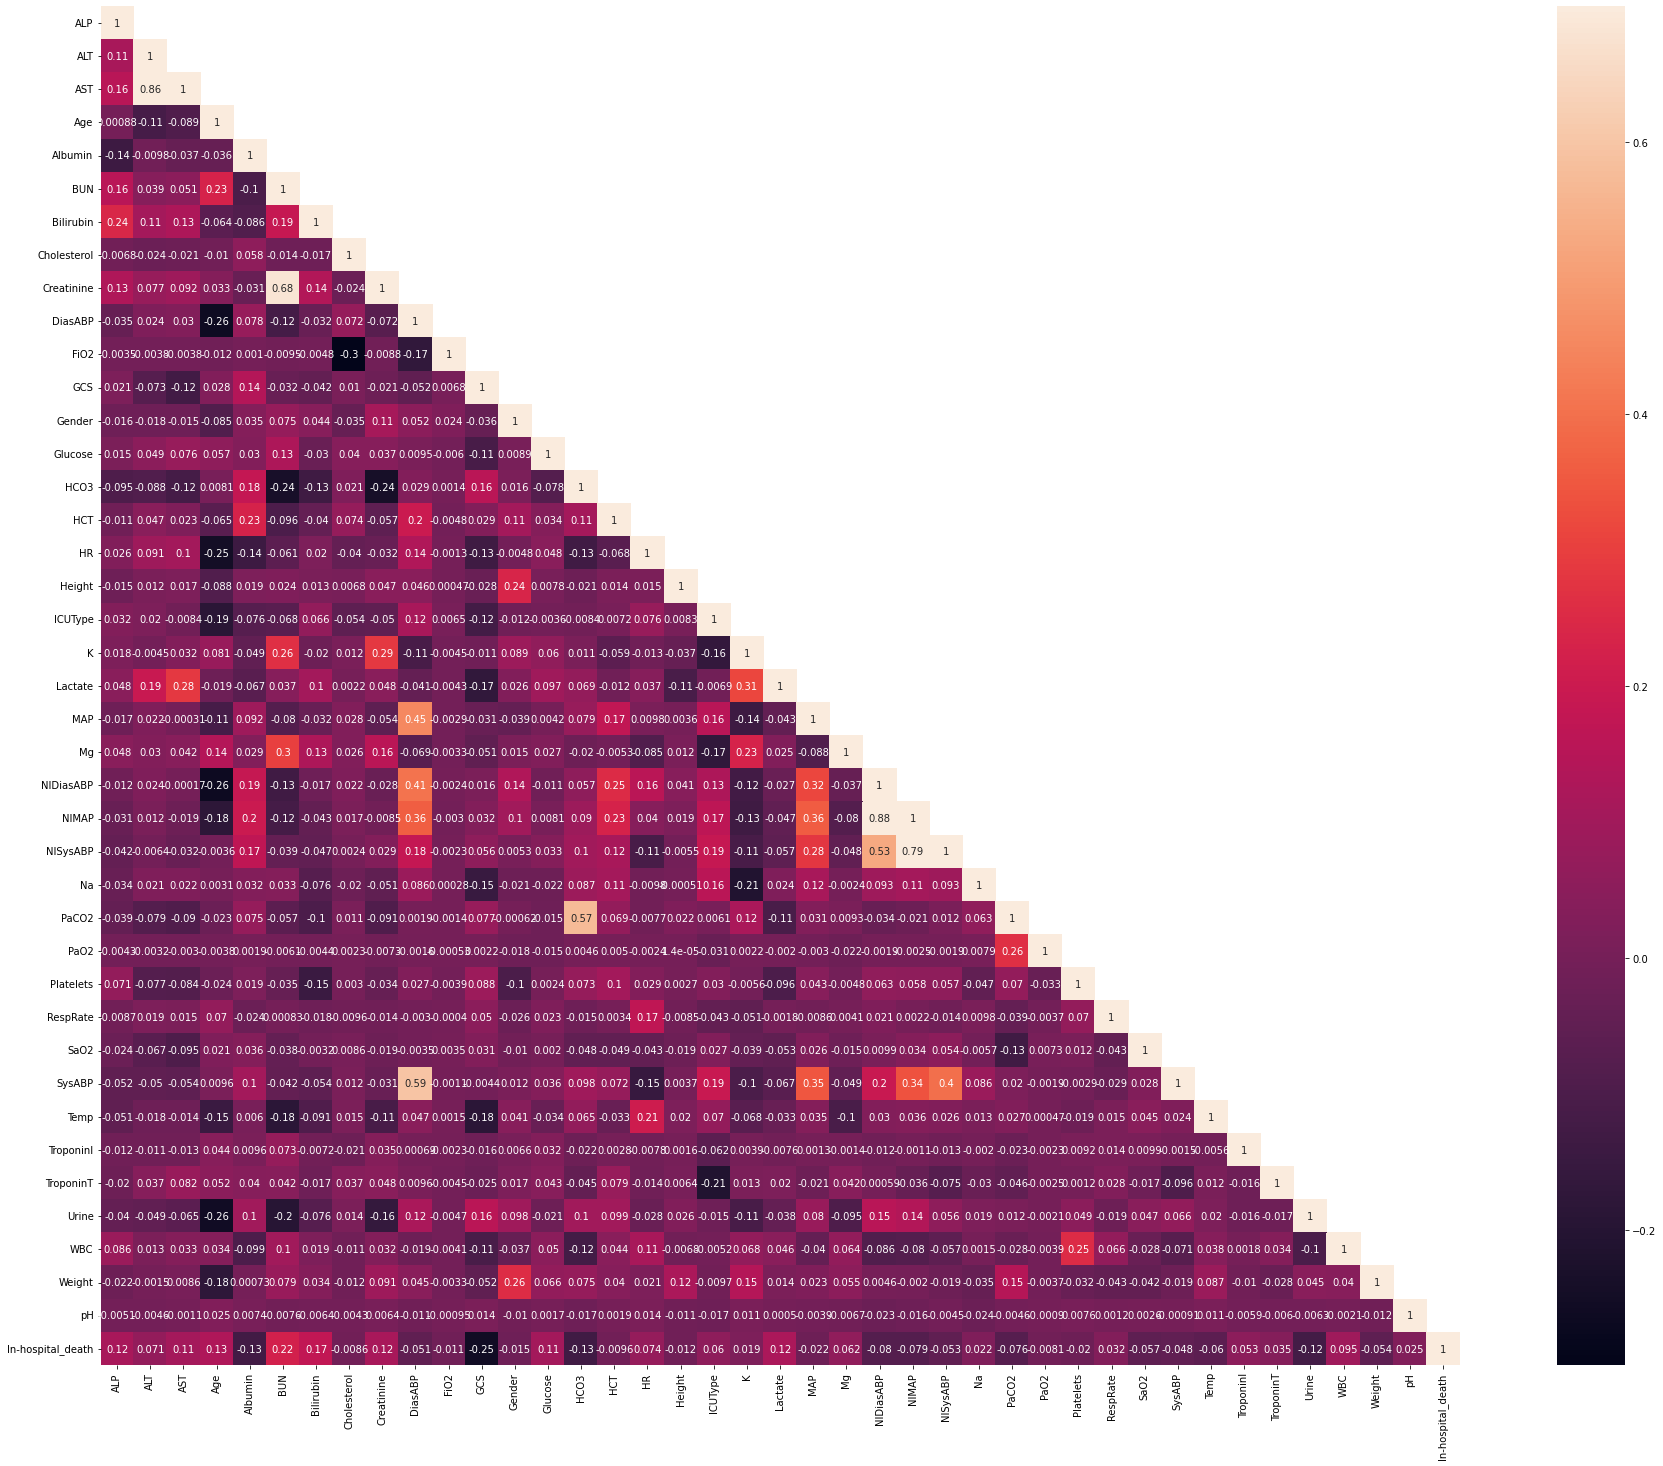

In [35]:
correlation_map = new_df[new_df.columns].corr()
obj = np.array(correlation_map)
obj[np.tril_indices_from(obj)] = False
fig, ax = plt.subplots()
fig.set_size_inches(35,25)
sns.heatmap(correlation_map, mask=obj, vmax = 0.7, square= True, annot= True)

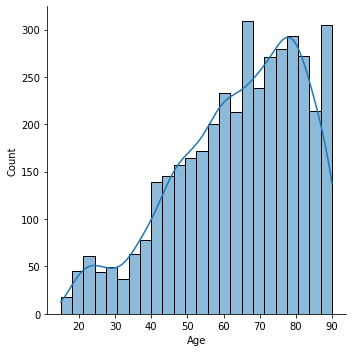

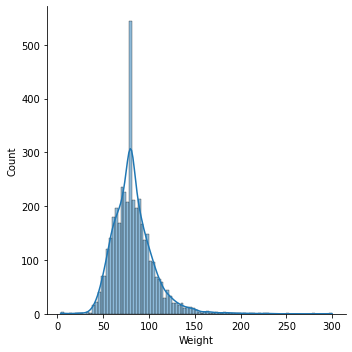

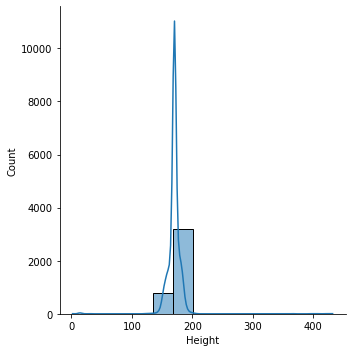

In [36]:
for i in ['Age', 'Weight', 'Height']:
  sns.displot(data=df[i], kde=True)
  plt.show()

In [72]:
X = df
y = labels

In [73]:
y.head()

,In-hospital_death
0,0
1,0
2,0
3,0
4,0


In [74]:
y.sum()/len(y)

In-hospital_death    0.138535
dtype: float64

In [54]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)

In [55]:
X_train.shape

(3199, 40)

In [56]:
y_train.value_counts()

In-hospital_death
0                    2756
1                     443
dtype: int64

In [57]:
y_test.value_counts()

In-hospital_death
0                    689
1                    111
dtype: int64

In [58]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler()

In [59]:
X_ros, y_ros = ros.fit_resample (X_train, y_train)

In [60]:
y_ros.value_counts()

In-hospital_death
0                    2756
1                    2756
dtype: int64

In [61]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_ros)
y_train = y_ros

In [62]:
X_train.shape

(5512, 40)

In [63]:
y_train.shape

(5512, 1)

In [64]:
y_train.value_counts()

In-hospital_death
0                    2756
1                    2756
dtype: int64

In [65]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.15, random_state=42)

In [66]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [67]:

from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(C=0.4, max_iter=1000, solver='liblinear')
lr = classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_val)
accuracy_LR = accuracy_score(y_val, y_pred)

from sklearn.tree import DecisionTreeClassifier

classifier2 = DecisionTreeClassifier (random_state=14)
dt = classifier2.fit (X_train, y_train)
y_pred2 = classifier2.predict (X_val)

accuracy_DT = accuracy_score (y_val, y_pred2)

from sklearn.ensemble import RandomForestClassifier

classifier3 = RandomForestClassifier(random_state=14)
rfi = classifier3.fit (X_train, y_train)
y_pred3 = classifier3.predict(X_val)

accuracy_RFI = accuracy_score(y_val, y_pred3)

from sklearn.ensemble import RandomForestClassifier
classifier4 = RandomForestClassifier (criterion = "entropy")
rfe = classifier4.fit(X_train, y_train)
y_pred4 = classifier4.predict (X_val)

accuracy_RFE = accuracy_score (y_val, y_pred4)

from sklearn.svm import SVC
model_svm = SVC (cache_size=100)
svm = model_svm.fit(X_train, y_train)
y_pred5 = model_svm.predict(X_val)

accuracy_svc = accuracy_score(y_val, y_pred5)

from sklearn.neighbors import KNeighborsClassifier
model_knn3 = KNeighborsClassifier(n_neighbors=3)
knn = model_knn3.fit(X_train, y_train)
pred_knn3 = model_knn3.predict(X_val)

accuracy_KNN = accuracy_score(y_val, pred_knn3)


from sklearn.ensemble import VotingClassifier

evc = VotingClassifier(estimators=[('lr', lr), ('rfi', rfi), ('rfe', rfe), ('DT', dt), ('svm', svm), ('knn', knn)], voting='hard',
                       flatten_transform = True)
model_evc = evc.fit(X_train, y_train)
pred_evc = evc.predict(X_val)
accuracy_evc = accuracy_score(y_val, pred_evc)

list1 = ['LogisticRegression', 'DecisionTreeClassifier', 'RandomForestClassifier', 'RandomForestClassifier(entropy)', 'SVM', 'KNN',' Voting'] 

list2 = [accuracy_LR, accuracy_DT, accuracy_RFI, accuracy_RFE, accuracy_svc, accuracy_KNN,accuracy_evc ]
list3 = [classifier,classifier2,classifier3,classifier4,model_svm, model_knn3]

df_Accuracy = pd.DataFrame({'Method Used':list1, 'Accuracy':list2})
print(df_Accuracy)



                       Method Used  Accuracy
0               LogisticRegression  0.742443
1           DecisionTreeClassifier  0.938331
2           RandomForestClassifier  0.983071
3  RandomForestClassifier(entropy)  0.978235
4                              SVM  0.781137
5                              KNN  0.915357
6                           Voting  0.968561


AxesSubplot(0.125,0.125;0.775x0.755)


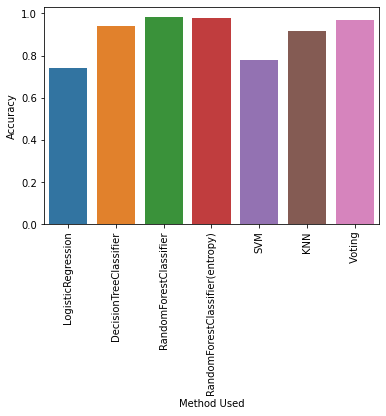

In [68]:
chart = sns.barplot(x='Method Used', y ='Accuracy', data = df_Accuracy)
chart.set_xticklabels(chart.get_xticklabels(), rotation = 90)
print(chart)

In [69]:
for i in list3:
  print('*********************************', i   ,'**************************************')
  print()
  print(classification_report(y_val, i.predict(X_val)))
  print("Confusion matrix", '\n','\n', confusion_matrix(y_val, i.predict(X_val)))

********************************* LogisticRegression(C=0.4, max_iter=1000, solver='liblinear') **************************************

              precision    recall  f1-score   support

           0       0.74      0.74      0.74       409
           1       0.75      0.74      0.74       418

    accuracy                           0.74       827
   macro avg       0.74      0.74      0.74       827
weighted avg       0.74      0.74      0.74       827

Confusion matrix 
 
 [[303 106]
 [107 311]]
********************************* DecisionTreeClassifier(random_state=14) **************************************

              precision    recall  f1-score   support

           0       1.00      0.88      0.93       409
           1       0.89      1.00      0.94       418

    accuracy                           0.94       827
   macro avg       0.95      0.94      0.94       827
weighted avg       0.95      0.94      0.94       827

Confusion matrix 
 
 [[358  51]
 [  0 418]]
*********

In [70]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_test = scaler.fit_transform(X_test)

In [71]:
for i in list3:
  print('*********************************', i   ,'**************************************')
  print()
  print(classification_report(y_test, i.predict(X_test)))
  print("Confusion matrix", '\n','\n', confusion_matrix(y_test, i.predict(X_test)))

********************************* LogisticRegression(C=0.4, max_iter=1000, solver='liblinear') **************************************

              precision    recall  f1-score   support

           0       0.92      0.91      0.92       689
           1       0.50      0.52      0.51       111

    accuracy                           0.86       800
   macro avg       0.71      0.72      0.71       800
weighted avg       0.86      0.86      0.86       800

Confusion matrix 
 
 [[630  59]
 [ 53  58]]
********************************* DecisionTreeClassifier(random_state=14) **************************************

              precision    recall  f1-score   support

           0       0.87      0.83      0.85       689
           1       0.16      0.21      0.18       111

    accuracy                           0.74       800
   macro avg       0.51      0.52      0.51       800
weighted avg       0.77      0.74      0.75       800

Confusion matrix 
 
 [[570 119]
 [ 88  23]]
*********

Xgb

In [75]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)

In [77]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.20, random_state=42)

In [78]:
import xgboost as xgb
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

In [80]:
clf_xgb = xgb.XGBClassifier()
clf_xgb.fit(X_train, y_train, early_stopping_rounds=10, eval_metric='aucpr', eval_set=[(X_val, y_val)])

[0]	validation_0-aucpr:0.33495
Will train until validation_0-aucpr hasn't improved in 10 rounds.
[1]	validation_0-aucpr:0.385387
[2]	validation_0-aucpr:0.391175
[3]	validation_0-aucpr:0.41258
[4]	validation_0-aucpr:0.420747
[5]	validation_0-aucpr:0.439852
[6]	validation_0-aucpr:0.446381
[7]	validation_0-aucpr:0.44952
[8]	validation_0-aucpr:0.461495
[9]	validation_0-aucpr:0.46332
[10]	validation_0-aucpr:0.462582
[11]	validation_0-aucpr:0.455616
[12]	validation_0-aucpr:0.459341
[13]	validation_0-aucpr:0.452589
[14]	validation_0-aucpr:0.457321
[15]	validation_0-aucpr:0.460528
[16]	validation_0-aucpr:0.471926
[17]	validation_0-aucpr:0.461872
[18]	validation_0-aucpr:0.470346
[19]	validation_0-aucpr:0.465163
[20]	validation_0-aucpr:0.468325
[21]	validation_0-aucpr:0.467733
[22]	validation_0-aucpr:0.466702
[23]	validation_0-aucpr:0.460847
[24]	validation_0-aucpr:0.459571
[25]	validation_0-aucpr:0.458961
[26]	validation_0-aucpr:0.463811
Stopping. Best iteration:
[16]	validation_0-aucpr:0.47192

XGBClassifier()

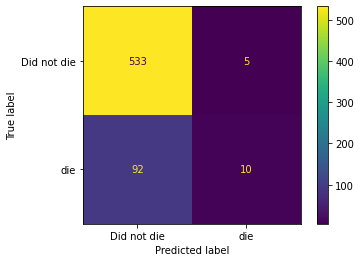

In [81]:
plot_confusion_matrix(clf_xgb,
                      X_val,
                      y_val,
                      values_format = 'd',
                      display_labels=['Did not die', 'die'])

In [85]:
from sklearn.model_selection import GridSearchCV

In [86]:
param_grid = {
    'max_depth': [3,4,5],
    'learning_rate': [0.1, 0.01, 0.05],
    'gamma': [0, 0.25, 1.0],
    'reg_lambda': [0, 1.0, 10.0],
    'scale_pos_weight': [1,3,5]
}

In [87]:
optimal_params = GridSearchCV(
    estimator = xgb.XGBClassifier(objective='binary:logistic', seed=42, subsample=0.9, colsample_bytree=0.5),
    param_grid=param_grid,
    scoring='roc_auc',
    verbose=0,
    n_jobs = 10,
    cv = 3
)

In [88]:
optimal_params.fit(X_train, y_train, early_stopping_rounds=10,
                   eval_metric = 'auc',
                   eval_set=[(X_val, y_val)],
                             verbose = False)

GridSearchCV(cv=3,
             estimator=XGBClassifier(colsample_bytree=0.5, seed=42,
                                     subsample=0.9),
             n_jobs=10,
             param_grid={'gamma': [0, 0.25, 1.0],
                         'learning_rate': [0.1, 0.01, 0.05],
                         'max_depth': [3, 4, 5], 'reg_lambda': [0, 1.0, 10.0],
                         'scale_pos_weight': [1, 3, 5]},
             scoring='roc_auc')

In [89]:
print(optimal_params.best_params_)

{'gamma': 1.0, 'learning_rate': 0.05, 'max_depth': 5, 'reg_lambda': 1.0, 'scale_pos_weight': 5}


In [90]:
clf_xgb = xgb.XGBClassifier(objective="binary:logistic", gamma= 1, learning_rate= 0.05, max_depth= 5, reg_lambda= 1, 
                            scale_pos_weight= 5,missing=None, seed=42)
clf_xgb.fit(X_train, y_train,
            verbose=True,
            early_stopping_rounds=10,
            eval_metric='aucpr',
            eval_set=[(X_val, y_val)])

[0]	validation_0-aucpr:0.377041
Will train until validation_0-aucpr hasn't improved in 10 rounds.
[1]	validation_0-aucpr:0.429157
[2]	validation_0-aucpr:0.414883
[3]	validation_0-aucpr:0.425842
[4]	validation_0-aucpr:0.425186
[5]	validation_0-aucpr:0.432984
[6]	validation_0-aucpr:0.425125
[7]	validation_0-aucpr:0.432115
[8]	validation_0-aucpr:0.43437
[9]	validation_0-aucpr:0.418894
[10]	validation_0-aucpr:0.420907
[11]	validation_0-aucpr:0.41446
[12]	validation_0-aucpr:0.406137
[13]	validation_0-aucpr:0.407085
[14]	validation_0-aucpr:0.40903
[15]	validation_0-aucpr:0.419593
[16]	validation_0-aucpr:0.426625
[17]	validation_0-aucpr:0.44215
[18]	validation_0-aucpr:0.437934
[19]	validation_0-aucpr:0.439694
[20]	validation_0-aucpr:0.446422
[21]	validation_0-aucpr:0.450367
[22]	validation_0-aucpr:0.454698
[23]	validation_0-aucpr:0.456071
[24]	validation_0-aucpr:0.456868
[25]	validation_0-aucpr:0.455784
[26]	validation_0-aucpr:0.460005
[27]	validation_0-aucpr:0.46153
[28]	validation_0-aucpr:0

XGBClassifier(gamma=1, learning_rate=0.05, max_depth=5, scale_pos_weight=5,
              seed=42)

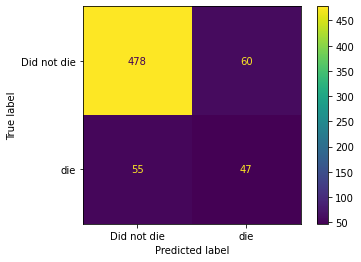

In [91]:
plot_confusion_matrix(clf_xgb,
                      X_val,
                      y_val,
                      values_format = 'd',
                      display_labels=['Did not die', 'die'])